In [76]:
# Sex	         nominal		                 M, F, and I (infant)
# Length	   continuous	    mm	     Longest shell measurement
# Diameter	   continuous	    mm	     perpendicular to length
# Height	   continuous	    mm	     with meat in shell
# Whole weight   continuous	    grams	     whole abalone
# Shucked weight continuous	    grams	     weight of meat
# Viscera weight continuous	    grams	     gut weight (after bleeding)
# Shell weight   continuous	    grams	     after being dried
# Rings		   integer			           +1.5 gives the age in years(标签)  
title = ['sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'], ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'], ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'], ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'], ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]


c:\Users\quezi\.conda\envs\weibodatacleaning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 8.497266   17.501976  ]
 [-3.2272494   0.57887846]
 [ 7.6414256  -5.7858515 ]
 [ 5.8795524   3.1101365 ]
 [-2.3045301   0.97313946]]
[ 6  0 18 ...  2 15 17]
[ 1.  1. -1. ...  1. -1.  1.]


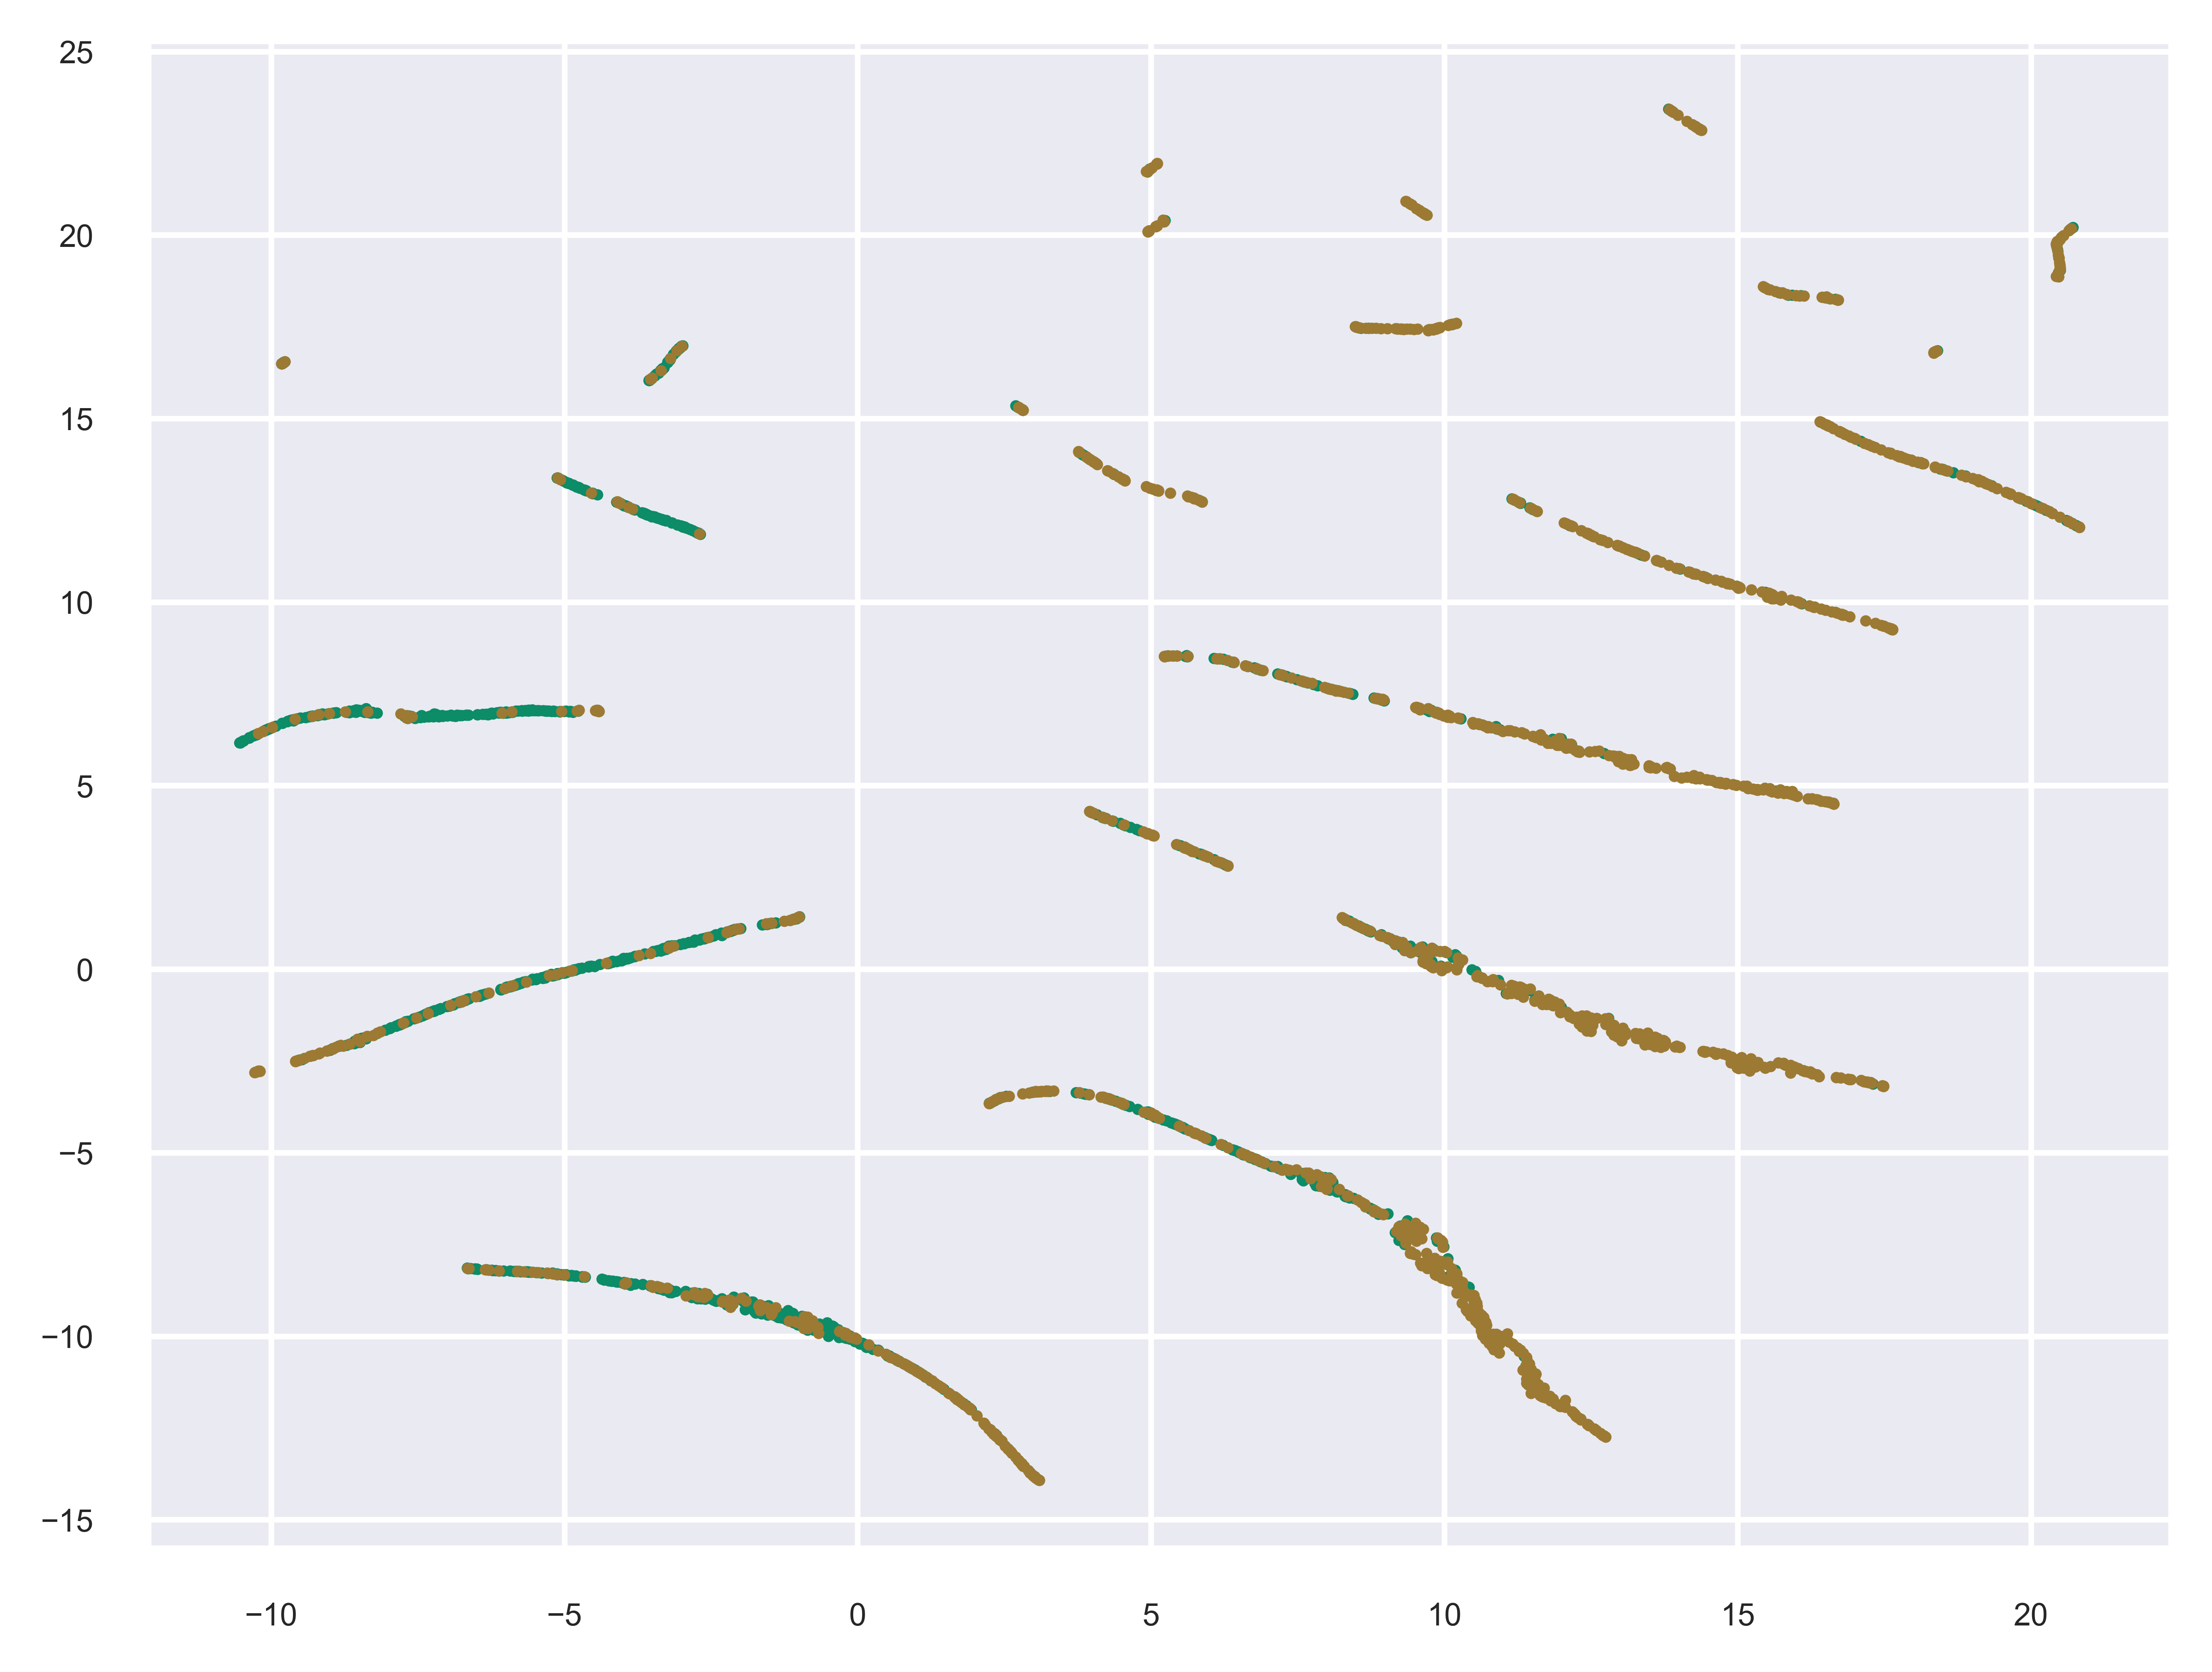

In [77]:
# 读取 鲍鱼数据集.csv
data = []
with open('鲍鱼数据集.csv') as f:
    for line in f:
        data.append(line.strip().split(','))

print(data[:5])
# 第一列是由M F I代表的性别
# 输出一列  M 转化 1 。F 转化 -1 。I 转化 0
for i in range(len(data)):
    if data[i][0] == 'M':
        data[i][0] = 1
    elif data[i][0] == 'F':
        data[i][0] = -1
    else:
        data[i][0] = 0

# 将数据转化为浮点数
data = [[float(x) for x in line] for line in data]



# 删除I
# data = [line for line in data if line[0] != 'I']
# data = [[float(x) for x in line[1:]] for line in data if line[0] == 'F']




# data 转化为numpy数组
import numpy as np
data = np.array(data)

# 保存第一列作为标签，删除第一列
label = data[:, 0]
data = data[:, 1:]



# 进行KMeans聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

# 降维 使用umap
import umap
Odata = umap.UMAP().fit_transform(data)
print(Odata[:5])

# 可视化
import matplotlib.pyplot as plt
# plt.scatter(Odata[:, 0], Odata[:, 1], c=y_kmeans, s=1, cmap='viridis')
# plt.show()
print(y_kmeans)
print(label)
# 获取类别的数量
n_clusters = len(np.unique(label))

# 生成随机颜色
colors = np.random.rand(n_clusters, 3)

plt.figure(dpi=1000)

# 绘制散点图，使用随机颜色
for i in range(n_clusters):
    plt.scatter(Odata[label == i, 0], Odata[label == i, 1], color=colors[i], s=1)

plt.show()


[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'], ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'], ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'], ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'], ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7']]
[[ 1.      0.455   0.365  ...  0.101   0.15   15.    ]
 [ 1.      0.35    0.265  ...  0.0485  0.07    7.    ]
 [-1.      0.53    0.42   ...  0.1415  0.21    9.    ]
 ...
 [ 1.      0.6     0.475  ...  0.2875  0.308   9.    ]
 [-1.      0.625   0.485  ...  0.261   0.296  10.    ]
 [ 1.      0.71    0.555  ...  0.3765  0.495  12.    ]]


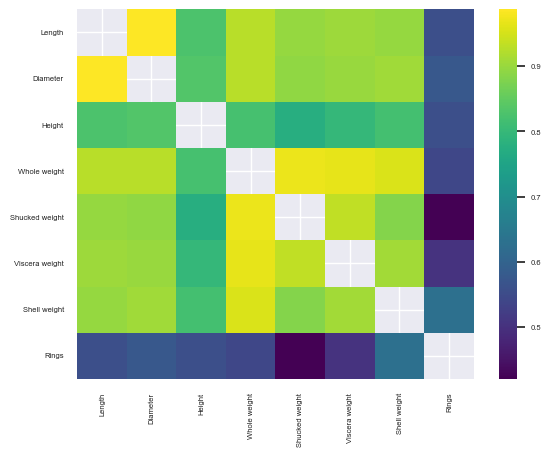

In [78]:
# 读取 鲍鱼数据集.csv
data = []
with open('鲍鱼数据集.csv') as f:
    for line in f:
        data.append(line.strip().split(','))

print(data[:5])
# 第一列是由M F I代表的性别
# 输出一列  M 转化 1 。F 转化 -1 。I 转化 0
for i in range(len(data)):
    if data[i][0] == 'M':
        data[i][0] = 1
    elif data[i][0] == 'F':
        data[i][0] = -1
    else:
        data[i][0] = 0

# 将数据转化为浮点数
data = [[float(x) for x in line] for line in data]




# data 转化为numpy数组
import numpy as np
data = np.array(data)
print(data)

import seaborn as sns
import matplotlib.pyplot as plt
data = np.corrcoef(data[:, 1:].T)
# 删除主对角线
for i in range(data.shape[0]):
    data[i, i] = None

# 计算相关性，使用皮尔逊相关系数，绘制热力图,使用 title作为横轴纵轴图例
# 在热力图中，每个方格中绘制对于的相关系数
sns.heatmap(data, cmap='viridis', xticklabels=title[1:], yticklabels=title[1:])
plt.show()